# Brexit Speeches Data Processing and EDA <br> 
## *for Topic Modelling*

Here we're going to perform some routine data processing techniques and EDA on two Brexit speeches prior to the vote in July 2016: one from Boris Johnson, a leave campaigner, and one from Theresa May, a remainer. The aim of this project is to try and uncover some inghts into the key topics brought up in each speech. Such insights will include: 
* what were the key topics?
* how often were they brought up, relative to other topics?
* what was the sentiment surrounding each topic for both politicians? 
    * how does the sentiment of one topic by one politician compare against the other?

Ultimately, the aim of this project is to perform **Topic Modelling** on the two speech transcripts. In machine learning, a **topic model** is specifically defined as a natural language processing technique used to discover hidden semantic structures of text in a collection of documents, usually called a corpus.

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

### Read in the data

Unfortunately, the conservative party website does not permit webscraping. So I've saved the transcripts as csvs and we'll connect tot hem using pandas.

In [2]:
boris_speech = pd.read_csv("Boris Brexit Speech.csv")
boris_speech.head(10)

,Sentence
0,I am pleased that this campaign has so far bee...
1,"That rocked me, at first, and then I decided t..."
2,"For many of us who are now deeply sceptical, t..."
3,We can see the sunlit meadows beyond. I believ...
4,"It is true, but profoundly uninformative about..."
5,You only have to read the Lisbon Treaty – whos...
6,In recent years Brussels has acquired its own ...
7,Look at that list of Lisbon competences – with...
8,The independence of this country is being seri...
9,People are surprised and alarmed to discover t...


In [3]:
may_speech = pd.read_csv("May Brexit Speech.csv")
may_speech.head(10)

,Sentence
0,"Today I want to talk about the United Kingdom,..."
1,"But before I start, I want to make clear that ..."
2,Sovereignty and membership of multilateral ins...
3,"In essence, the question the country has to an..."
4,"I use the word “maximise” advisedly, because n..."
5,"Today, those factors continue to have their ef..."
6,These institutions invite nation states to mak...
7,Article 5 of NATO’s Washington Treaty is a goo...
8,Looking back at history – and not very distant...
9,How we reconcile these institutions and their ...


### Data Cleaning

* remove punctuation and numbers
* stemming /lemmatization
* tokenization

To begin the data cleaning process, we'll first apply a round of cleaning to remove punctuation, numbers and convert eevrything to lower case.

#### Remove punctuation and numbers

In [4]:
import re

def clean_text_1(text):
    text = re.sub("[^\sa-zA-Z]", " ", text)
    text = text.lower()
    return text

In [5]:
boris_clean = pd.DataFrame(boris_speech['Sentence'].apply(lambda x: clean_text_1(x)))
boris_clean.head(3)

,Sentence
0,i am pleased that this campaign has so far bee...
1,that rocked me at first and then i decided t...
2,for many of us who are now deeply sceptical t...


In [6]:
may_clean = pd.DataFrame(may_speech['Sentence'].apply(lambda x: clean_text_1(x)))
may_clean.head(3)

,Sentence
0,today i want to talk about the united kingdom ...
1,but before i start i want to make clear that ...
2,sovereignty and membership of multilateral ins...


#### Lemmatization

We'll also perform some lemmatization on each transcript. Lemmatization is the process of reducing a word to its base or root form, which is known as the lemma. This is often used in natural language processing to group together different inflections of the same word.

In [7]:
import spacy
# lemmatization example
nlp = spacy.load("en_core_web_sm")
demo_doc = nlp("eating eats eat ate adjustable rafting meeting playing")

for token in demo_doc:
    print(token, "|", token.lemma_)

eating | eat
eats | eat
eat | eat
ate | eat
adjustable | adjustable
rafting | raft
meeting | meeting
playing | play


In [8]:
boris_tokenized = str(' '.join(list(boris_clean['Sentence'])))
boris_lemmatized =[]
[boris_lemmatized.append(tok.lemma_) for tok in nlp(boris_tokenized)]

# remove spaces and words lessthan 2 characters
for i in boris_lemmatized:
    if len(i) < 3:
        boris_lemmatized.remove(i)

print(nlp(boris_tokenized[:200]))
print(boris_lemmatized[:200])

i am pleased that this campaign has so far been relatively free of personal abuse   and long may it so remain   but the other day someone insulted me in terms that were redolent of     s soviet russia
['pleased', 'that', 'this', 'campaign', 'have', 'far', 'relatively', 'free', 'personal', 'abuse', 'and', 'long', 'may', 'remain', 'but', 'the', 'other', 'day', 'someone', 'insult', 'term', 'that', 'redolent', '    ', 'soviet', 'russia', 'say', 'that', 'have', 'right', 'vote', 'leave', 'because', 'fact', 'liberal', 'cosmopolitan', 'that', 'rock', 'first', 'and', 'then', 'decide', 'that', 'insult', 'didn', 'mind', 'all', 'because', 'probably', 'true', 'and', 'want', 'this', 'morning', 'explain', 'why', 'the', 'campaign', 'leave', 'the', 'attract', 'other', 'liberal', 'spirit', 'and', 'people', 'admire', 'such', 'david', 'owen', 'and', 'gisela', 'stuart', 'nigel', 'lawson', 'john', 'longworth', 'people', 'who', 'love', 'europe', 'and', 'who', 'feel', 'home', 'the', 'continent', 'but', 'whose

In [9]:
may_tokenized = str(' '.join(list(may_clean['Sentence'])))
may_lemmatized =[]
[may_lemmatized.append(tok.lemma_) for tok in nlp(may_tokenized)]

# remove spaces and words lessthan 2 characters
for i in may_lemmatized:
    if len(i) < 3:
        may_lemmatized.remove(i)

print(nlp(may_tokenized[:200]))
print(may_lemmatized[:200])

today i want to talk about the united kingdom  our place in the world and our membership of the european union  but before i start  i want to make clear that   as you can see   this is not a rally   i
['today', 'want', 'talk', 'about', 'the', 'united', 'kingdom', 'our', 'place', 'the', 'world', 'and', 'our', 'membership', 'the', 'european', 'union', 'but', 'before', 'start', 'want', 'make', 'clear', 'that', 'you', 'can', 'see', 'this', 'not', 'rally', 'will', 'not', 'attack', 'even', 'criticism', 'people', 'who', 'take', 'different', 'view', 'will', 'simply', 'analysis', 'the', 'right', 'and', 'wrong', 'the', 'opportunity', 'and', 'risk', 'our', 'membership', 'the', 'sovereignty', 'and', 'membership', 'multilateral', 'institution', 'essence', 'the', 'question', 'the', 'country', 'have', 'answer', 'june', 'whether', 'leave', 'remain', 'about', 'how', 'maximise', 'britain', 'security', 'prosperity', 'and', 'influence', 'the', 'world', 'and', 'how', 'maximise', 'our', 'sovereignty', 'that

### Document-Term Matrix

A document-term matrix is a mathematical representation of the words or terms that appear in a collection of documents, often used for text analysis. Each word in the document will become a column in the DataFrame. For each sentence in the transcript, represented in the DataFrame by its row id, there will be a **1** in the column if that word appears, **0** if not.

In [10]:
boris_df = pd.DataFrame(boris_lemmatized)
boris_df.rename(columns={0: 'token'}, inplace=True)

In [11]:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(boris_df['token'])
data_dtm_boris = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())
data_dtm_boris.index = boris_df.index
data_dtm_boris.head(3)

,able,absolutely,absolutist,abstract,absurd,absurdity,abuse,accelerate,accept,access,...,world,worrying,wrong,wto,xenophobe,year,young,youth,yugoslavia,zealand
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
may_df = pd.DataFrame(may_lemmatized)
may_df.rename(columns={0: 'token'}, inplace=True)

In [13]:
cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(may_df['token'])
data_dtm_may = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())
data_dtm_may.index = may_df.index
data_dtm_may.head(3)

,ability,able,abroad,absence,abu,accept,access,accord,account,accountable,...,world,worth,worthwhile,wrong,wto,year,yes,yesterday,york,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Exploratory Data Analysis

We can do some quick EDA to get a preliminary look at the most used words in each speech. This will give us some indication of the topics that we can generate for our model.

In [14]:
boris_cols = list(data_dtm_boris.columns)
boris_word_dict = {}

for col in boris_cols:
    total_words = data_dtm_boris[col].sum()
    boris_word_dict[col] = total_words

# sort dictionary so we can see top 10 words and counts
print(sorted(boris_word_dict.items(), key=lambda item: item[1])[::-1][:10])

[('country', 29), ('european', 27), ('europe', 21), ('year', 20), ('people', 20), ('trade', 18), ('single', 18), ('change', 18), ('market', 16), ('economic', 15)]


Boris seemed to mention a lot about **europe** as you'd expect. He was after all trying to convince people to vote to leave the Eurpeoan Union. He also seemed to talk a lot about **trade** and the **economy**. This was a key selling point for leavers. It's a little surprising that **immigration** doesn't appear in the top 10. We may see more of immigration later in the guided LDA stage.

In [15]:
may_cols = list(data_dtm_may.columns)
may_word_dict = {}

for col in may_cols:
    total_words = data_dtm_may[col].sum()
    may_word_dict[col] = total_words

# sort dictionary so we can see top 10 words and counts
print(sorted(may_word_dict.items(), key=lambda item: item[1])[::-1][:10])

[('britain', 57), ('european', 48), ('country', 36), ('trade', 30), ('union', 26), ('right', 25), ('europe', 25), ('remain', 24), ('member', 24), ('make', 24)]


The top 10 words in Theresa May's brexit speech don't really give us a strong indication of any particular theme. Again, there is a high mention of **european/europe** but that doesn't tell us much. Interestingly, Theresa May's highest mentioned word is britain, which you'd expect to be in Boris Johnson's speech if anything. I say this because leavers really tried to build a sense of nation-pride and even nationalism surrounding the decision to vote leave. May did mention **trade** a high number of times - probably as a key argument for remainers was the benefit of free trade offered by EU membership.

It's important to remember that the analysis in this notebook is a <font color='red'>***Bag of Words*** </font> appraoch. This means that we're only looking at the words used in isolation. There's no scope in this notebook to look at the association of words in a sentence, or in a paragraph. This does have its limitations when the aim fo the project is topic modelling. But it still is useful for getting an idea of twhat was covered in the speeches.

### Wordcloud

A great way to visualise the most used words is by way of wordclouds. We'll create them here for both Theresa may and Boris Johnson's speeches.

In [16]:
# import stopwords from nltk library
from nltk.corpus import stopwords
english_stopwords = stopwords.words('english')

from wordcloud import WordCloud
#create wordcloud object
wc = WordCloud(stopwords=english_stopwords, background_color='white', colormap='Dark2_r',
							max_font_size=150, random_state=42)

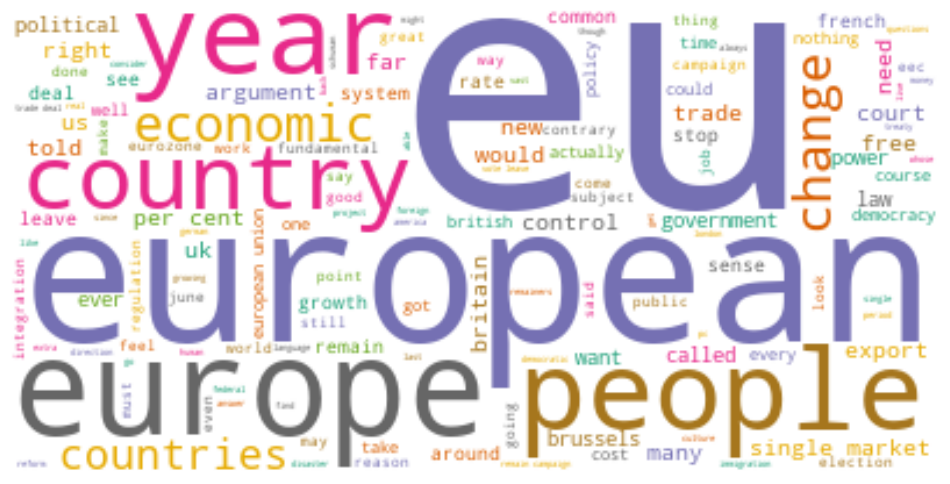

In [17]:
# Boris Johnson wordcloud

plt.rcParams['figure.figsize'] = [12, 8] # size of the visual

# the wordcloud visual requires the document to be in one string 
wc.generate(boris_tokenized)

plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

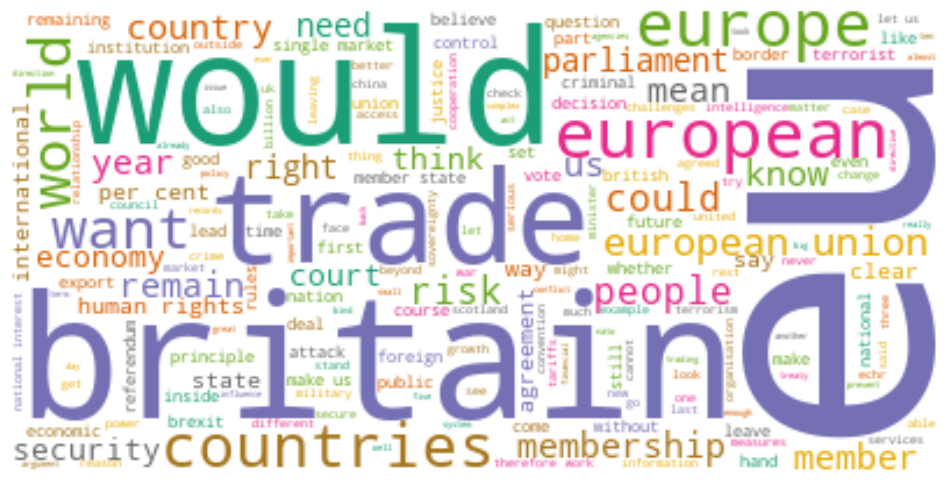

In [18]:
# Theresa May wordcloud

plt.rcParams['figure.figsize'] = [12, 8] # size of the visual

wc.generate(may_tokenized)

plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

### Pickle the DTM DataFrames

In [21]:
boris_clean.to_pickle("Pickled Files/boris_speech.pkl")
may_clean.to_pickle("Pickled Files/may_speech.pkl")

data_dtm_boris.to_pickle("Pickled Files/data_dtm_boris.pkl")
data_dtm_may.to_pickle("Pickled Files/data_dtm_may.pkl")

Next Steps
* reconstruct each speech into a dataframe where each row is a sentence.
    - split by 'full stop' delimeter
* perform a sentiment analysis on each sentence
* repeat topic modelling on each row/sentence in the df/transcript

* separate notebook for sentiment analysis on sentence topic modelling 